 <h2><center>Sultan Qaboos University</center>
 <center>Department of Computer Science</center>
 <center>COMP4603 - FL 2022</center>
 <center>HW1 - Introduction to Machine learning (Classification problem)</center>


import libraries the we will use it

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector


   #  Attribute                     Domain
   -- -----------------------------------------
       1. Sample code number            id number
       2. Clump Thickness               1 - 10
       3. Uniformity of Cell Size       1 - 10
       4. Uniformity of Cell Shape      1 - 10
       5. Marginal Adhesion             1 - 10
       6. Single Epithelial Cell Size   1 - 10
       7. Bare Nuclei                   1 - 10
       8. Bland Chromatin               1 - 10
       9. Normal Nucleoli               1 - 10
      10. Mitoses                       1 - 10
      11. Class:                        (2 for benign, 4 for malignant)

here i put all the columns name of dataset in list; since the dataset without columns header

In [50]:
columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

### 1)	Load the dataset as a dataframe with column names included.


In [51]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv',names=columns)
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


-----------------------------------------------------

### 2)	Show dataset description.

In [15]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


in the discribtion :

    count: Count number of non-NA/null observations.
    mean : Mean of the values.
    std: Standard deviation of the observations.
    min: Minimum of the values in the object.
    25%: lower percentage
    50%: meadian
    75%: upper percentage
    max: Maximum of the values in the object.

-----------------------------------------------------

### 3)	Check if there are missing values or not.

    if so, repair the dataset either by deleting the corresponding rows or by replacing the missing values with other relevant values that you believe are more representative.


In [55]:
#check if the dataset has a Nan value
dataset.isna().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [17]:
# by observation we see we have insufficient value which is '?'
# so, i replace it with NaN value
df = df.replace("?",np.NaN)

In [18]:
df.head(30)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [56]:
# here i drop NaN value
df = df.dropna()
df.head(30)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


-----------------------------------------------------

### 4)	Show some scatter plots using pairs of features. Provide a brief discussion.

Text(0, 0.5, 'Mitoses')

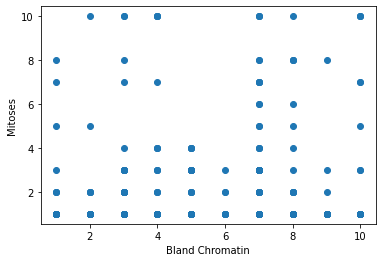

In [67]:
plt.scatter(df[columns[7]],df[columns[9]])
plt.xlabel(columns[7])
plt.ylabel(columns[9])

the figure above display the scater plots between Mitoses and Bland Chromation columns

it`s lock like they have no relation between them

-----------------------------------------------------

### 5)	Extract the features into a matrix X and labels (last column in the dataset) into a vector y.

    - Convert the labels to 0, for benign, and 1 for malignant.


In [22]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [23]:
X

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1
695,841769,2,1,1,1,2,1,1,1,1
696,888820,5,10,10,3,7,3,8,10,2
697,897471,4,8,6,4,3,4,10,6,1


In [43]:
Y = Y.astype('category')
Y.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [44]:
Y = Y.replace({2:0,4:1})
Y.value_counts()

0    444
1    239
Name: Class, dtype: int64

---------------------------------------------------------

### 6)	Split the dataset into training and test sets.

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3 , random_state=42)


In [27]:
x_test

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
304,653777,8,3,4,9,3,10,3,3,1
149,1187805,8,8,7,4,10,10,7,8,7
217,1223426,1,1,1,1,2,1,3,1,1
120,1174057,1,1,2,2,2,1,3,1,1
314,704097,1,1,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
268,324427,10,8,8,2,3,4,8,7,8
360,877291,6,10,10,10,10,10,8,10,10
238,1242364,8,10,10,8,6,9,3,10,10
634,1257366,3,1,1,1,2,1,1,1,1


In [28]:
x_train

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
183,1205138,5,8,8,8,5,10,7,8,1
472,1257608,6,1,1,1,1,1,1,1,1
444,780555,5,1,1,6,3,1,2,1,1
85,1147748,5,10,6,1,10,4,4,10,10
516,1320077,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
73,1125035,9,4,5,10,6,10,4,8,1
108,1171710,1,1,1,1,2,1,2,3,1
279,476903,10,5,7,3,3,7,3,3,8
450,1201870,4,1,1,3,1,1,2,1,1


---------------------------------------------------------

### 7)	Train a K-NN classifier with the number of neighbors k=1.

In [46]:
KNN_model = KNeighborsClassifier(n_neighbors = 1)

In [47]:
KNN_model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

-------------------------------------------

### 8)	Evaluate the trained classifier on the test set.

In [48]:
y_predict = KNN_model.predict(x_test)

-------------------------------------------

### 9)	Report classifier performance in terms of classifier accuracy on the test set.

In [49]:
accuracy_score(y_test,y_predict)

0.6780487804878049

-------------------------------------------

### 10)	Discuss the results.

the percentage of model`s correct prediction is 67.8% and this mean is very low accurate 

-------------------------------------------

### 11)	Apply feature scaling (using minmax and z-score scalers) and redo 7, 8 and 9.

#### with feature Scalling (min_mix)

In [62]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
x_MMscaler_test = mm_scaler.transform(x_test)
x_MMscaler_train = mm_scaler.transform(x_train)
# fit the scalerd train set into classifier model
KNN_model.fit(x_MMscaler_train , y_train)
# predict the labels of scalerd test det
ysclaer_predict = KNN_model.predict(x_MMscaler_test)
# compute accurecy of Classifier model after scaled
accuracy_score(y_test,ysclaer_predict)

0.9463414634146341

#### with Z-score scaler

In [64]:
Z_scaler = StandardScaler()
Z_scaler.fit(x_train)
x_Zscaler_test = Z_scaler.transform(x_test)
x_Zscaler_train = Z_scaler.transform(x_train)
# fit the scalerd train set into classifier model
KNN_model.fit(x_Zscaler_train , y_train)
# predict the labels of scalerd test det
y_Zsclaer_predict = KNN_model.predict(x_Zscaler_test)
# compute accurecy of Classifier model after scaled
accuracy_score(y_test,y_Zsclaer_predict)

0.9414634146341463

-------------------------------------------

### 12)	Compare and discuss the results obtained before and after feature scaling. 

before Scaling : 67.8 %

after Min-Max-scaler : 94.6 %

after Z-scaler : 94.1%

So, the model get petter acurate percentage after we scaled feature

and it will git better when we use Min-Max-sclaer.

-------------------------------------------

### 13)	Apply dimensionality reduction using feature selection. Keep only 2 features.

In [39]:
KNN_model = KNeighborsClassifier(n_neighbors = 1)
# create the feature selection model
sfs = SequentialFeatureSelector(KNN_model,n_features_to_select = 2)
sfs.fit(x_train, y_train)
X_train_reduced  = sfs.transform(x_train)
X_test_reduced = sfs.transform(x_test)

In [70]:
# display which columns is selected by selection model
sfs.support_

array([False, False,  True, False, False, False,  True, False, False,
       False])

-------------------------------------------

### 14)	Show the scatter plot of the reduced dataset.

Text(0, 0.5, 'Bare Nuclei')

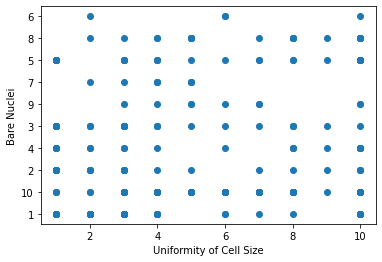

In [68]:
plt.scatter(df[columns[2]],df[columns[6]])
plt.xlabel(columns[2])
plt.ylabel(columns[6])

### 15)	Redo 7, 8 and 9.

In [66]:
KNN_model.fit(X_train_reduced,y_train)
y_pred_sfs = KNN_model.predict(X_test_reduced)
accuracy_score(y_test,y_pred_sfs)

0.9365853658536586

### 16)	Compare and discuss the results obtained before and after feature selection. 